## **Forecasting Time Series Data Using Facebook Fbprophet**

Steps required with Fbprophet
1. Introduction and Installation
2. Data Preprocessing with Time Series
3. Model Fitting 
4. Obtaining the forecast
5. Plotting the Forecast
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the Performance metrics
9. Conclusions

In [ ]:
#pip install pystan

In [ ]:
#conda install -c conda-forge fbprophet

In [1]:
import pandas as pd
import os
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [3]:
df=pd.read_csv('datasets/monthly-milk-production-pounds.csv')

In [4]:
from fbprophet import Prophet

In [5]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [ ]:
##Data Preprocessing

In [ ]:
##168 row is useless for forecasting so we will drop it

In [7]:
df.drop(168,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


<AxesSubplot:>

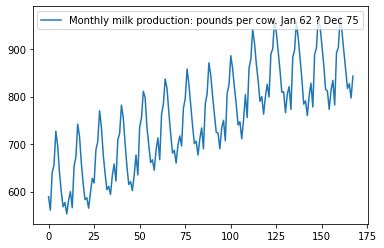

In [9]:
df.plot()

In [ ]:
#Here Column name is big we will change as per our convinience

In [10]:
df.columns=['ds','y']

In [11]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
#this above column is not in date time format so will convert this into date time format

In [12]:
df['ds']=pd.to_datetime(df['ds'])

In [13]:
df.head()#hence now we have convert it into date time format

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [47]:
df.tail()

,ds,y
163,1975-08-01,-38.0
164,1975-09-01,-41.0
165,1975-10-01,10.0
166,1975-11-01,-30.0
167,1975-12-01,46.0


<AxesSubplot:>

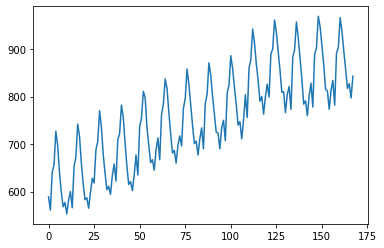

In [14]:
df['y'].plot()

In [ ]:
#This above is seasonal data.For fitting model we have to convert this data into stationary data
#So there are many ways to convert data into stationary data. 

In [15]:
df['y'].shift(1)#means the value in y is shifted down by 1

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [16]:
#to make stationary one easy approach would be
df['y']=df['y']-df['y'].shift(1)

In [17]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


<AxesSubplot:>

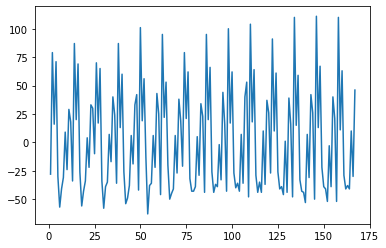

In [18]:
df['y'].plot()

In [ ]:
#Here now data has become stationary i.e have equal variance.If suppose data has not become stationary so we can again subtract with shift to 1 value

In [20]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [21]:
### Initialize the model
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#It has been considered as year seasonality because there is no function of monthly seasonality.

In [22]:
model

In [23]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [24]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [27]:
#Now we will try to make future Data Frame for prediction of 365 days
future_dates=model.make_future_dataframe(periods=365)
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [28]:
df.tail()

,ds,y
163,1975-08-01,-38.0
164,1975-09-01,-41.0
165,1975-10-01,10.0
166,1975-11-01,-30.0
167,1975-12-01,46.0


In [46]:
future_dates.shape

(533, 1)

In [ ]:
#from above we can see that for 1 year future dataframe has been created

In [31]:
#Prediction
prediction=model.predict(future_dates)

In [32]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.042913,18.349422,36.585159,2.042913,2.042913,24.994813,24.994813,24.994813,24.994813,24.994813,24.994813,0.0,0.0,0.0,27.037726
1,1962-02-01,2.041199,-47.784269,-28.905997,2.041199,2.041199,-40.255677,-40.255677,-40.255677,-40.255677,-40.255677,-40.255677,0.0,0.0,0.0,-38.214478
2,1962-03-01,2.039650,85.023415,104.219295,2.039650,2.039650,93.019984,93.019984,93.019984,93.019984,93.019984,93.019984,0.0,0.0,0.0,95.059634
3,1962-04-01,2.037935,7.176520,25.807988,2.037935,2.037935,14.324889,14.324889,14.324889,14.324889,14.324889,14.324889,0.0,0.0,0.0,16.362824
4,1962-05-01,2.036276,53.042749,71.896713,2.036276,2.036276,60.541982,60.541982,60.541982,60.541982,60.541982,60.541982,0.0,0.0,0.0,62.578257


In [33]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


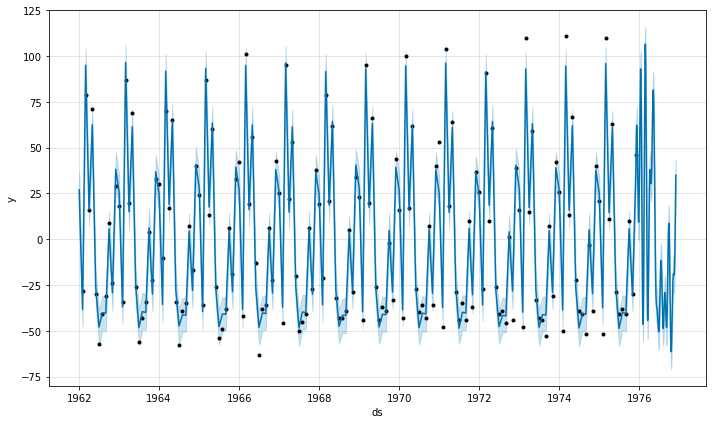

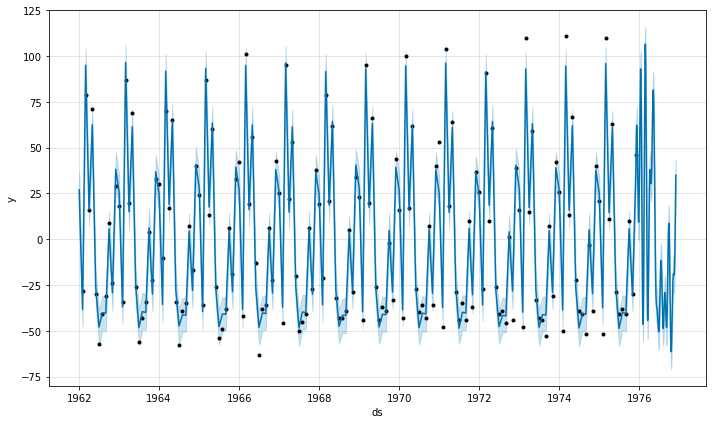

In [34]:
#Plot the prediction projection
model.plot(prediction)

#### This above fuction gives 2 plots it doesn't have any difference.Dark blue is our predicted value and black dot is out actual value in our dataset.Light blue line is showing trend

In [35]:
# We can visualize each components i.e trends such as:

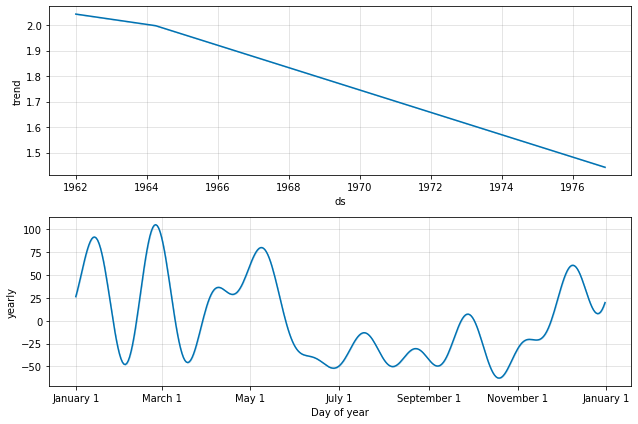

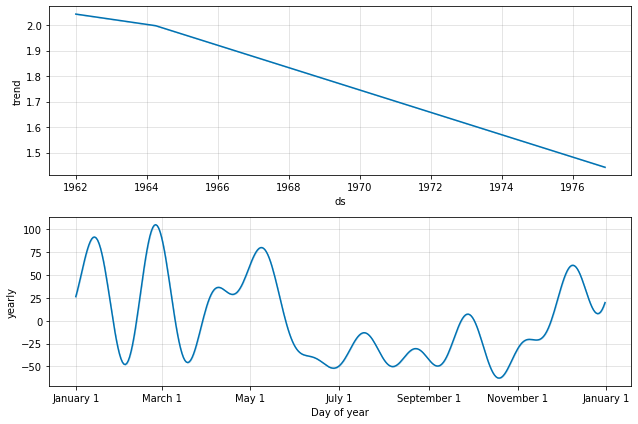

In [36]:
model.plot_components(prediction)

In [37]:
# From above how it easily shows trends and monthly analysis also

#### Here we are not splitting our data into train and test as data is small.So we are using Cross validation technique

### Cross Validation

Here we are measuring forecast error using historical data. We'll do this by comparing predicted values with the actual values. In order to perform this operation we slect cut-off points in history of data and fit the model with data upto that cut-off point.Afterward we compare the actual value to predicted values. 
Cross validation functions:
1. Horizon the forecast horizon
2. Initial the size of the initial training period
3. Period the spacing between cutoff points

In [43]:
from fbprophet.diagnostics import cross_validation

In [44]:
df_cv=cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [49]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898372,-46.005506,-34.787907,-49.0,1965-07-21
1,1965-09-01,-34.869323,-40.334120,-29.306623,-38.0,1965-07-21
2,1965-10-01,6.103171,0.130866,11.336693,6.0,1965-07-21
3,1965-11-01,-20.281526,-25.815387,-15.217979,-19.0,1965-07-21
4,1965-12-01,36.035431,30.508282,41.756902,33.0,1965-07-21


In [50]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,123.507332,11.113385,9.161182,0.263226,0.199329,0.458333
1,42 days,115.157257,10.731135,8.590800,0.232837,0.185464,0.541667
2,43 days,123.606434,11.117843,8.841748,0.226625,0.185464,0.541667
3,46 days,89.659052,9.468846,7.896947,0.213816,0.185464,0.583333
4,47 days,87.137443,9.334744,7.680085,0.209953,0.175652,0.625000
...,...,...,...,...,...,...,...
175,357 days,30.262409,5.501128,4.559345,0.127925,0.102945,0.791667
176,360 days,33.203767,5.762271,4.784932,0.139630,0.102945,0.750000
177,361 days,35.607144,5.967172,4.946567,0.143281,0.102945,0.708333
178,362 days,34.543897,5.877406,4.808274,0.141183,0.102945,0.708333


In [51]:
#We can plot graph also such as we take rmse so graph would be horizon vs rmse

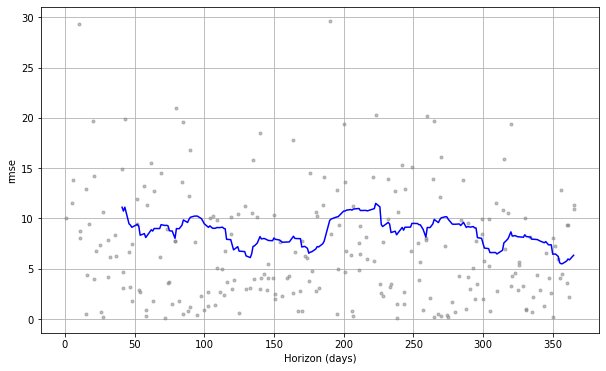

In [52]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')